<a href="https://colab.research.google.com/github/engom/My_Codes_Dsti/blob/main/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# load the whole diabetes dataset and separate x and y
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
# check the shape 
diabetes_x.shape

(442, 10)

In [20]:
# check the length (it's a vector)
len(diabetes_y)

442

In [21]:
# Use only one feature
diabetes_x = diabetes_x[:, np.newaxis, 2]
diabetes_x.shape

(442, 1)

In [22]:
# plit x to get x_train and chose 8 columns 
diabetes_x_train = diabetes_x[:-20] # leave out 20 last rows
print(diabetes_x_train.shape)

# get x_test and coose 8 columns
diabetes_x_test = diabetes_x[-20:] # take only last 20 rows
print(diabetes_x_test.shape)

(422, 1)
(20, 1)


In [23]:
# split y to get y_train
diabetes_y_train = diabetes_y[:-20] # leave out 20 last rows
print(len(diabetes_y_train))
# get y_test
diabetes_y_test = diabetes_y[-20:] # take only last 20 rows
print(len(diabetes_y_test))

422
20


In [24]:
# instanciate the model
lin_reg = linear_model.LinearRegression()

# train
lin_reg.fit(diabetes_x_train, diabetes_y_train)

LinearRegression()

In [25]:
# predict on x_test
y_pred = lin_reg.predict(diabetes_x_test)

In [26]:
# get mean square error
print(f"The mean square error of the model mse= {mean_squared_error(diabetes_y_test, y_pred)}")

The mean square error of the model mse= 2548.0723987259694


In [27]:
# get coef de determinattion r2_score
print(f"The coefficient of determination r2_score = {r2_score(diabetes_y_test, y_pred)}")

The coefficient of determination r2_score = 0.47257544798227147


In [28]:
# get the intercep = b0
lin_reg.intercept_

152.91886182616167

In [29]:
# get coefficientc (b1, ...., b4)
lin_reg.coef_

array([938.23786125])

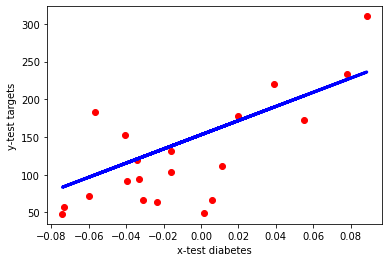

In [37]:
plt.scatter(diabetes_x_test, diabetes_y_test, color="red")
plt.plot(diabetes_x_test, y_pred, color="blue", linewidth=3)
plt.xlabel("x-test diabetes")
plt.ylabel("y-test targets")
plt.show()

In [31]:
# slicing stategy used above explaned here
a = [2, 1, 0, 5] # list or array-list
print(f'Get all except the last 2 : {a[:-2]}') # get all except last :-n here n=2
print(f'Get only the last item : {a[-1]}')  # get the last item of list or array-list

Get all except the last 2 : [2, 1]
Get only the last item : 5


In [32]:
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', version=1, cache=True)
#mnist.data.shape # or mnist['data'].shape